<h1 style="text-align: center">Linear Regression algorithm</h1>
<p style="text-align: center">Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It's used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog, mouse). It is a parametric technique. Parameters are estimated from the given data. Linear regression is a linear approach to modeling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables).</p>
<p style="text-align: center">The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. This section discusses simple linear regression.</p>
<p align="center"><img src="../../assets/LinearRegression/example.png" style="clip-path: polygon(0 15%, 100% 15%, 100% 100%, 0% 100%); max-width:400px"></p>
<p style="text-align: center">To predict the value of a dependent variable (y) based on a given independent variable (x), we use the following equation:</p>

$$y = mx + b$$
$$m = \frac{Covariance(x,y)}{Variance(x)} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$
$$b = \bar{y} - m\bar{x}$$
$$\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i, \; \bar{y} = \frac{1}{n}\sum_{i=1}^{n} y_i$$

<p style="text-align: center">
<strong>Covariance</strong> is a measure of the joint variability of two random variables and <strong>Variance</strong> is a measure of the variability of a single random variable <br>
<strong>x</strong> and <strong>y</strong> are the independent and dependent variables respectively <br>
<strong>m</strong> is the slope of the line <br>
<strong>b</strong> is the y-intercept <br> 
</p>

## Implementation

In [51]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.bias = None
        self.weight = None

    def _variance_(self, X):
        '''
        Variance - a measure of the spread between numbers in a data set
        '''
        return np.sum((X - np.mean(X))**2)
    
    def _covariance_(self, X, y):
        '''
        Covariance - a measure of the joint variability of two random variables
        '''
        return np.sum((X - np.mean(X)) * (y - np.mean(y)))

    def fit(self, X, y):
        self.weight = self._covariance_(X, y) / self._variance_(X)
        self.bias = np.mean(y) - np.dot(self.weight, np.mean(X))
    
    def predict(self, X):
        predict = self.bias + self.weight * X.T
        return predict
    
    def evaluate(self, X, y):
        return np.sum((self.predict(X) - y)**2)/len(y) # MSE (Mean Squared Error)
    
    def print(self):
        print("Weight: ", self.weight)
        print("Bias: ", self.bias)

## Dataset

We will use the <a href="https://www.kaggle.com/andonians/random-linear-regression" target="_blank">Random Linear Regression</a> dataset from Kaggle. It contains 1000 rows and 2 columns. The first column is the independent variable and the second column is the dependent variable. We will use the independent variable to predict the dependent variable.

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Dataset of 30 employees with their years of experience and salary
df = pd.DataFrame({'YearsExperience': [1.1, 1.3, 1.5, 2, 2.2, 2.9, 3, 3.2, 3.2, 3.7, 3.9, 4, 4, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6, 6.8, 7.1, 7.9, 8.2, 8.7, 9, 9.5, 9.6, 10.3, 10.5], 'Salary': [39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445, 57189, 63218, 55794, 56957, 57081, 61111, 67938, 66029, 83088, 81363, 93940, 91738, 98273, 101302, 113812, 109431, 105582, 116969, 112635, 122391, 121872]})

X = df['YearsExperience'].values
y = df['Salary'].values

## Train and Test

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

model.print()
print("MSE: ", model.evaluate(X_test, y_test))

Weight:  9423.815323030976
Bias:  25321.583011776813
MSE:  49830096.85590839


## Plot the data and the regression line

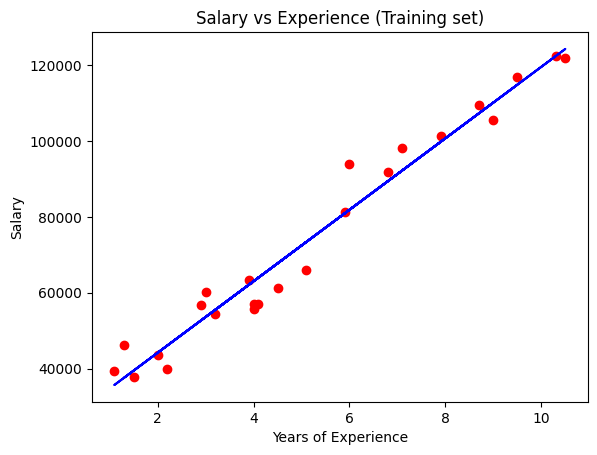

In [55]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()